In [1]:
from preprocessing import data
train_data,test_data,train_labels,test_labels =  data()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spartan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The below is the sparse matrix representation of the data

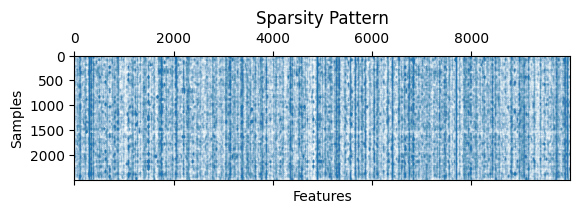

In [6]:
import matplotlib.pyplot as plt

# Assuming sparse_matrix is your data
plt.spy(test_data, markersize=0.010)
plt.title("Sparsity Pattern")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

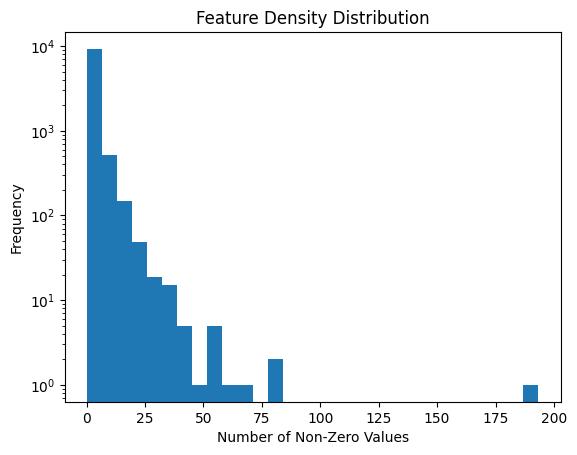

In [8]:
import numpy as np
from scipy.sparse import csr_matrix

# Assuming sparse_matrix is a csr_matrix
non_zero_counts = np.array(train_data.sum(axis=0)).flatten()  # Sum along rows
plt.hist(non_zero_counts, bins=30, log=True)
plt.title("Feature Density Distribution")
plt.xlabel("Number of Non-Zero Values")
plt.ylabel("Frequency")
plt.show()

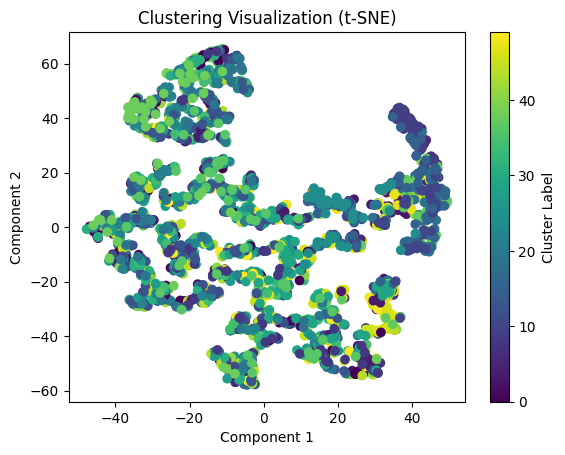

In [24]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Dimensionality reduction using Truncated SVD (better for sparse data)
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(train_data)

# Optionally use t-SNE for more non-linear separations
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(reduced_data)
label_to_color = [int(val) for val in train_labels]
# Scatter plot of reduced data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1],c= label_to_color, cmap='viridis')
plt.title("Clustering Visualization (t-SNE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

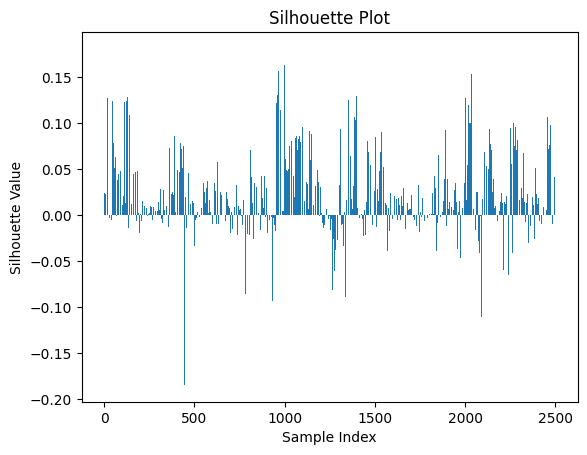

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

silhouette_vals = silhouette_samples(train_data, train_labels)

plt.bar(range(len(silhouette_vals)), silhouette_vals)
plt.title("Silhouette Plot")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Value")
plt.show()

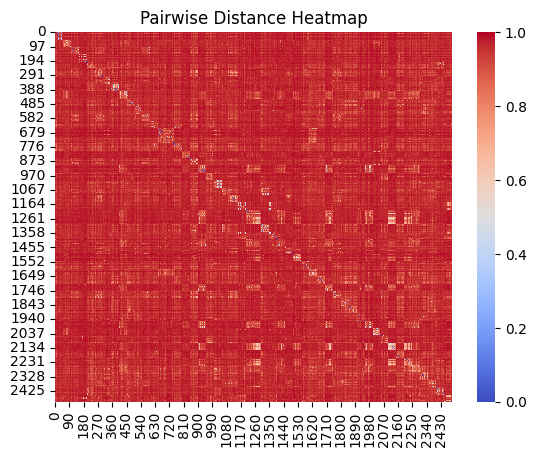

In [29]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

# Compute cosine distances
distances = pairwise_distances(test_data, metric="cosine")

sns.heatmap(distances, cmap="coolwarm")
plt.title("Pairwise Distance Heatmap")
plt.show()